In [3]:
import numpy as np
import math
from matplotlib import pylab as plts
# from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
# from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
# from root_pandas import read_root
import uproot
import time

In [6]:
filename="../PhS2_5x5/Skimmed/Skimmed-PhS-e*.root"    
ur=uproot.pandas.iterate(filename, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume','CreatorProcess'])
prevtime=time.time()
mylist=list(ur)        
newtime=time.time()

print(newtime-prevtime)

prevtime=time.time()
dftot5=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
newtime=time.time()
dftot5[['X','Y','dX','dY','Weight','Ekine']]=dftot5[['X','Y','dX','dY','Weight','Ekine']].astype('float16')


41.877455949783325


In [7]:
dftot5

,X,Y,dX,dY,Weight,Ekine,ProductionVolume,CreatorProcess
0,7.390625,-0.467041,0.700195,0.396729,0.000400,0.055756,b'ompton',b'WrappedCompton'
1,13.757812,-17.531250,0.079468,-0.686523,0.000400,0.186523,b'ompton',b'WrappedCompton'
2,23.281250,5.566406,0.132568,-0.247070,0.000400,0.176758,b'ompton',b'WrappedCompton'
3,19.875000,-23.421875,0.391846,-0.149780,0.000400,0.051941,b'ompton',b'WrappedCompton'
4,-50.218750,-6.253906,-0.570312,0.168823,0.000008,0.631348,b'ompton',b'WrappedCompton'
...,...,...,...,...,...,...,...,...
3162272,-2.847656,12.664062,-0.257080,0.237915,0.000008,1.044922,b'ompton',b'WrappedCompton'
3162273,38.968750,4.367188,0.239990,0.195557,0.000008,0.910156,b'ompton',b'WrappedCompton'
3162274,47.718750,2.541016,0.327148,0.055481,0.000008,1.312500,b'ompton',b'WrappedCompton'
3162275,2.173828,2.523438,0.018173,-0.345215,0.000400,0.921387,b'ompton',b'WrappedCompton'


In [8]:
filename="../PhS2_5x5/Skimmed/Skimmed-PhS-g*.root"    
ur=uproot.pandas.iterate(filename, "PhaseSpace", ['X','Y','dX','dY','Weight','Ekine','ProductionVolume','CreatorProcess'])
prevtime=time.time()
mylist=list(ur)        
newtime=time.time()

print(newtime-prevtime)

prevtime=time.time()
dftot5g=pd.concat(mylist, ignore_index=True, sort=False  ,copy = False)
newtime=time.time()
dftot5g[['X','Y','dX','dY','Weight','Ekine']]=dftot5g[['X','Y','dX','dY','Weight','Ekine']].astype('float16')


162.34188532829285


<BarContainer object of 1000 artists>

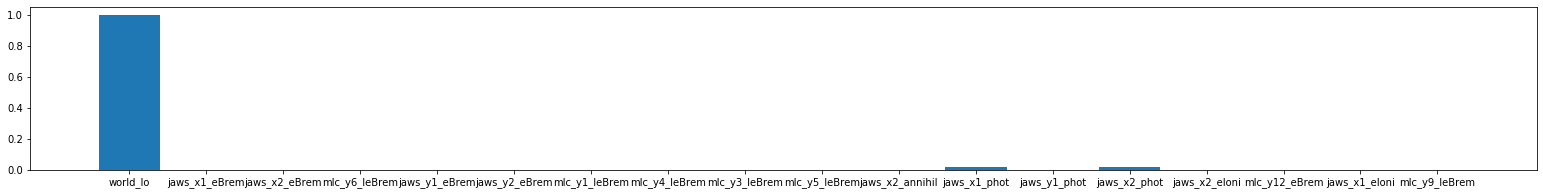

In [30]:
plt.figure(figsize=(27,3))
plt.bar(dftot5g.head(1000)['ProductionVolume'],dftot5g.head(1000)['Weight'])

In [45]:
unique5g=dftot5g.Weight.unique()

In [46]:
unique5e=dftot5.Weight.unique()

In [68]:
arr5g=np.array(unique5g)
np.sort(arr5g)

array([0.e+00, 2.e-07, 8.e-06, 4.e-04, 2.e-02, 1.e+00], dtype=float16)

In [75]:
dftot5g=dftot5g.sort_values(by='Weight')

In [76]:
df5gcounts=dftot5g['Weight'].value_counts()

In [107]:
dftot5gPV=dftot5g['ProductionVolume'].value_counts()
dftot5gPV

b'world_lo'         27589890
b'jaws_x2_eBrem'      612670
b'jaws_x1_eBrem'      608119
b'jaws_y2_eBrem'       63246
b'jaws_y1_eBrem'       63001
                      ...   
b'mlc_y3_lcompt'           2
b'jaws_y2VeBrem'           2
b'jaws_y1VeBrem'           1
b'mlc_y2_lcompt'           1
b'mlc_y10_compt'           1
Name: ProductionVolume, Length: 106, dtype: int64

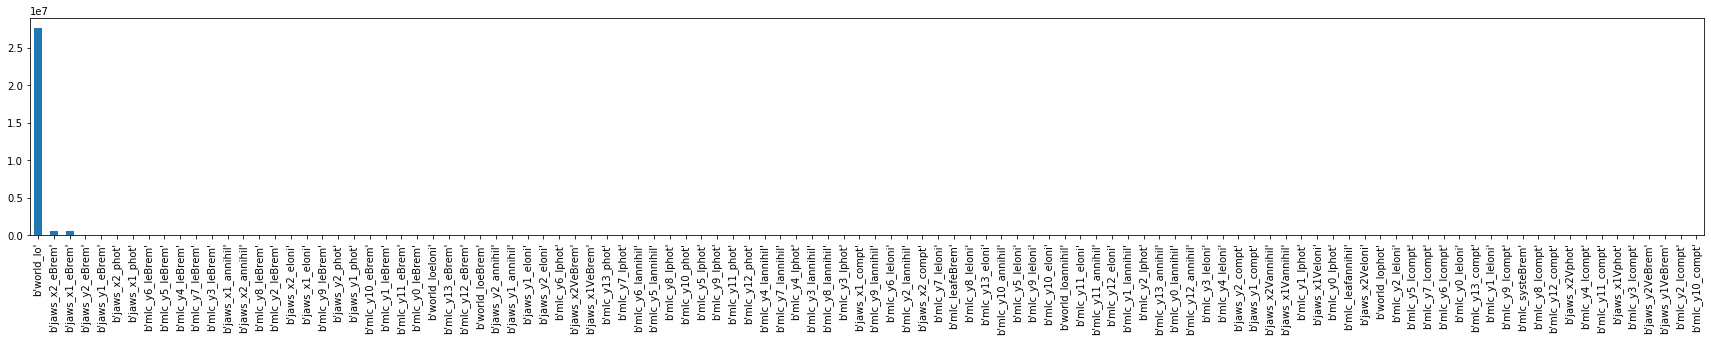

In [110]:
plt.figure(figsize=(30,4))
dftot5gPV.plot.bar()


In [95]:
df5ecounts=dftot5['Weight'].value_counts()
df5ecounts

4.000664e-04    2698897
7.987022e-06     337178
2.000427e-02      97172
1.788139e-07      27763
0.000000e+00        865
1.000000e+00        402
Name: Weight, dtype: int64

0.000000e+00        865
1.788139e-07      27763
7.987022e-06     337178
4.000664e-04    2698897
2.000427e-02      97172
1.000000e+00        402

In [82]:
df5gcounts

2.000427e-02    27544324
4.000664e-04     1449163
7.987022e-06      208739
1.000000e+00      160708
1.788139e-07       12130
0.000000e+00         307
Name: Weight, dtype: int64

# PhS2
```
0                  307   1/(50)^n 
0.00000016       12130   1/50/50/50/50 
0.000008        208739   1/50/50/50 
0.0004         1449163   1/50/50 
0.02          27544324   1/50 
1               160708   1 
```
# PhS1
```
0.0004           68 
0.02        9502899 
1             78311 
```

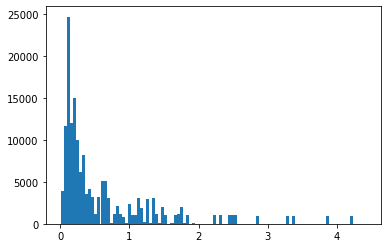

In [91]:
_=plt.hist(dftot5g[dftot5g['Weight']>0.5]['Ekine'],bins=100)

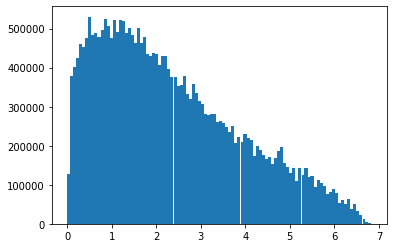

In [92]:
_=plt.hist(dftot5g[(dftot5g['Weight']<0.5)&(dftot5g['Weight']>1e-03)]['Ekine'],bins=100)

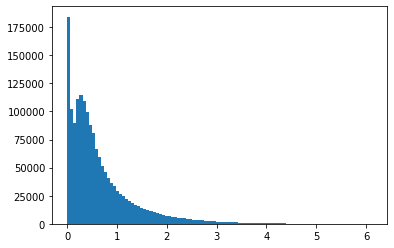

In [88]:
_=plt.hist(dftot5g[dftot5g['Weight']<5e-04]['Ekine'],bins=100)

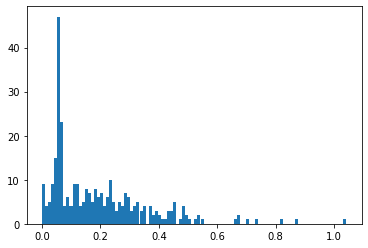

In [94]:
_=plt.hist(dftot5g[dftot5g['Weight']<1.688139e-07]['Ekine'],bins=100)